<a href="https://colab.research.google.com/github/sachinbhatiskb/Sparkle_internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


**Importing Libraries** 

In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Import and read dataset**

In [40]:
url='http://bit.ly/w-data'
s_data=pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The statistical details of the dataset is below:--

In [41]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

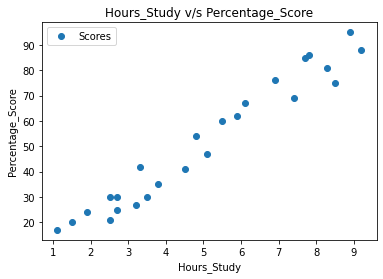

In [42]:
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours_Study v/s Percentage_Score')
plt.xlabel('Hours_Study')
plt.ylabel('Percentage_Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the Data**


Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels".

In [43]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm. Execute following command:

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()    
regressor.fit(X_train, y_train) 
print("Training Model")

Training Model


In [46]:
#Plotting for regression line
line = regressor.coef_*X+regressor.intercept_  

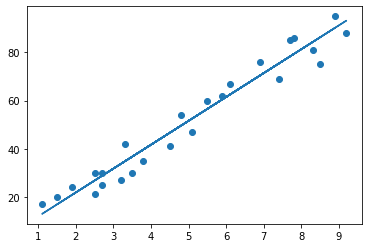

In [47]:
#plotting for test
plt.scatter(X, y)  
plt.plot(X, line);  
plt.show()  

**Predictions**

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
print('Training score', regressor.score(X_train,y_train))
print('Training score', regressor.score(X_test,y_test))

Training score 0.9515510725211553
Training score 0.9454906892105354


Plot the bar chart to depict the actual value and predict value

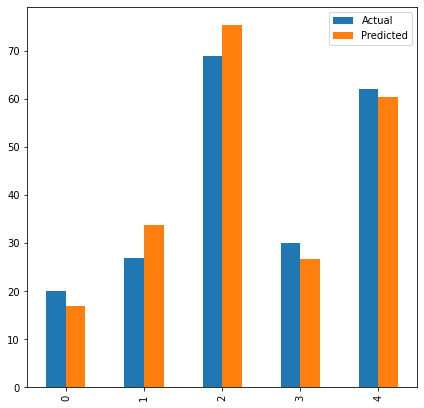

In [50]:
df.plot(kind='bar',figsize=(7,7))
plt.show()

Predicting for 9.25 hr

In [51]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred= regressor.predict(test)
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0])) 

Number of hours = 9.25
Prediction Score = 93.69173248737539


**Evaluating Model**

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
Explained Variance Score: 0.9482829156738145


Above final step is to evaluate the performance of algorithm.

This step is particularly important to compare how well different algorithm perform on perticular dataset.